# Membres de l'équipe

- **SBAI Yahia**
- **CHBANI Wissal**
- **KI Alidou**
- **BAHAFID Salah-Eddine**


# Exploitation du Dataset Final et Création des Modèles

Après avoir constitué notre dataset final regroupant les données immobilières enrichies par les informations environnementales, nous passons à la phase d'exploitation pour développer nos modèles de prédiction.

## Préprocessing des Données

Avant de créer nos modèles, un préprocessing complet a été réalisé sur le dataset final, incluant :

- **Nettoyage des Valeurs Aberrantes** : Identification et suppression des outliers pour améliorer la qualité des données.
- **Réduction des Features** : Analyse de la matrice de corrélation pour conserver uniquement les variables ayant un impact significatif sur la variable cible.
- **Encodage des Variables Catégorielles** : Transformation des variables catégorielles en variables numériques (par exemple, via le one-hot encoding).

Afin d'identifier la méthode de prétraitement la plus adaptée, deux versions du dataset nettoyé ont été générées :
- **Dataset Non Normalisé** : Les valeurs brutes après nettoyage.
- **Dataset Normalisé** : Les valeurs ont été normalisées pour harmoniser l'échelle des features.

## Développement des Modèles

Nous avons ensuite appliqué trois algorithmes de machine learning sur ces deux jeux de données afin de comparer leurs performances :

- **RandomForestRegressor**

- **CatBoostRegressor**

- **LGBMRegressor**


Chaque algorithme a été testé sur le dataset non normalisé et sur le dataset normalisé, permettant ainsi d'évaluer lequel des deux prétraitements est le plus optimal pour notre cas d'usage.

## Sélection du Meilleur Modèle

Après avoir évalué les performances de chaque modèle à l'aide de métriques telles que le R², le MSE et le MAE, nous sélectionnerons le modèle le plus performant pour notre projet. Ce modèle servira de base pour la prédiction finale de la valeur foncière des biens immobiliers.

---


## Importation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

## I. Pre-pocessing

In [7]:

data = pd.read_csv("dataset_final.csv", sep = ',', index_col=0)

data.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Banque,Poste,Restaurant,Agence immobilière,Commerce alimentaire,Commerce,Collège,Lycée,Enseignement supérieur,Généraliste,Médecine spécialisée,Pharmacie,Crèche,Piscine,Equipements sportifs extérieurs,Salle de sport,Divertissement Culturelle,Urgences,Monument,Parc
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083,21,1,596,106,154,619,1,1,9,13,148,19,7,4,1,19,8,0,1,5
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818,15,3,465,110,143,386,0,2,15,13,107,16,7,0,1,5,11,0,0,5
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255,22,2,175,145,77,190,5,3,5,37,243,17,2,0,2,5,0,0,0,5
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564,18,2,302,96,146,384,4,7,8,23,145,17,10,2,5,18,4,0,0,5
4,2023-01-03,295000.0,75017,Appartement,28.0,2,2.318419,48.893075,10,3,167,58,107,100,2,2,4,12,69,9,14,2,8,13,1,0,0,8


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39641 entries, 0 to 39640
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date_mutation                    39641 non-null  object 
 1   valeur_fonciere                  39641 non-null  float64
 2   code_postal                      39641 non-null  int64  
 3   type_local                       39641 non-null  object 
 4   surface_reelle_bati              39641 non-null  float64
 5   nombre_pieces_principales        39641 non-null  int64  
 6   longitude                        39641 non-null  float64
 7   latitude                         39641 non-null  float64
 8   Banque                           39641 non-null  int64  
 9   Poste                            39641 non-null  int64  
 10  Restaurant                       39641 non-null  int64  
 11  Agence immobilière               39641 non-null  int64  
 12  Commerce alimentaire   

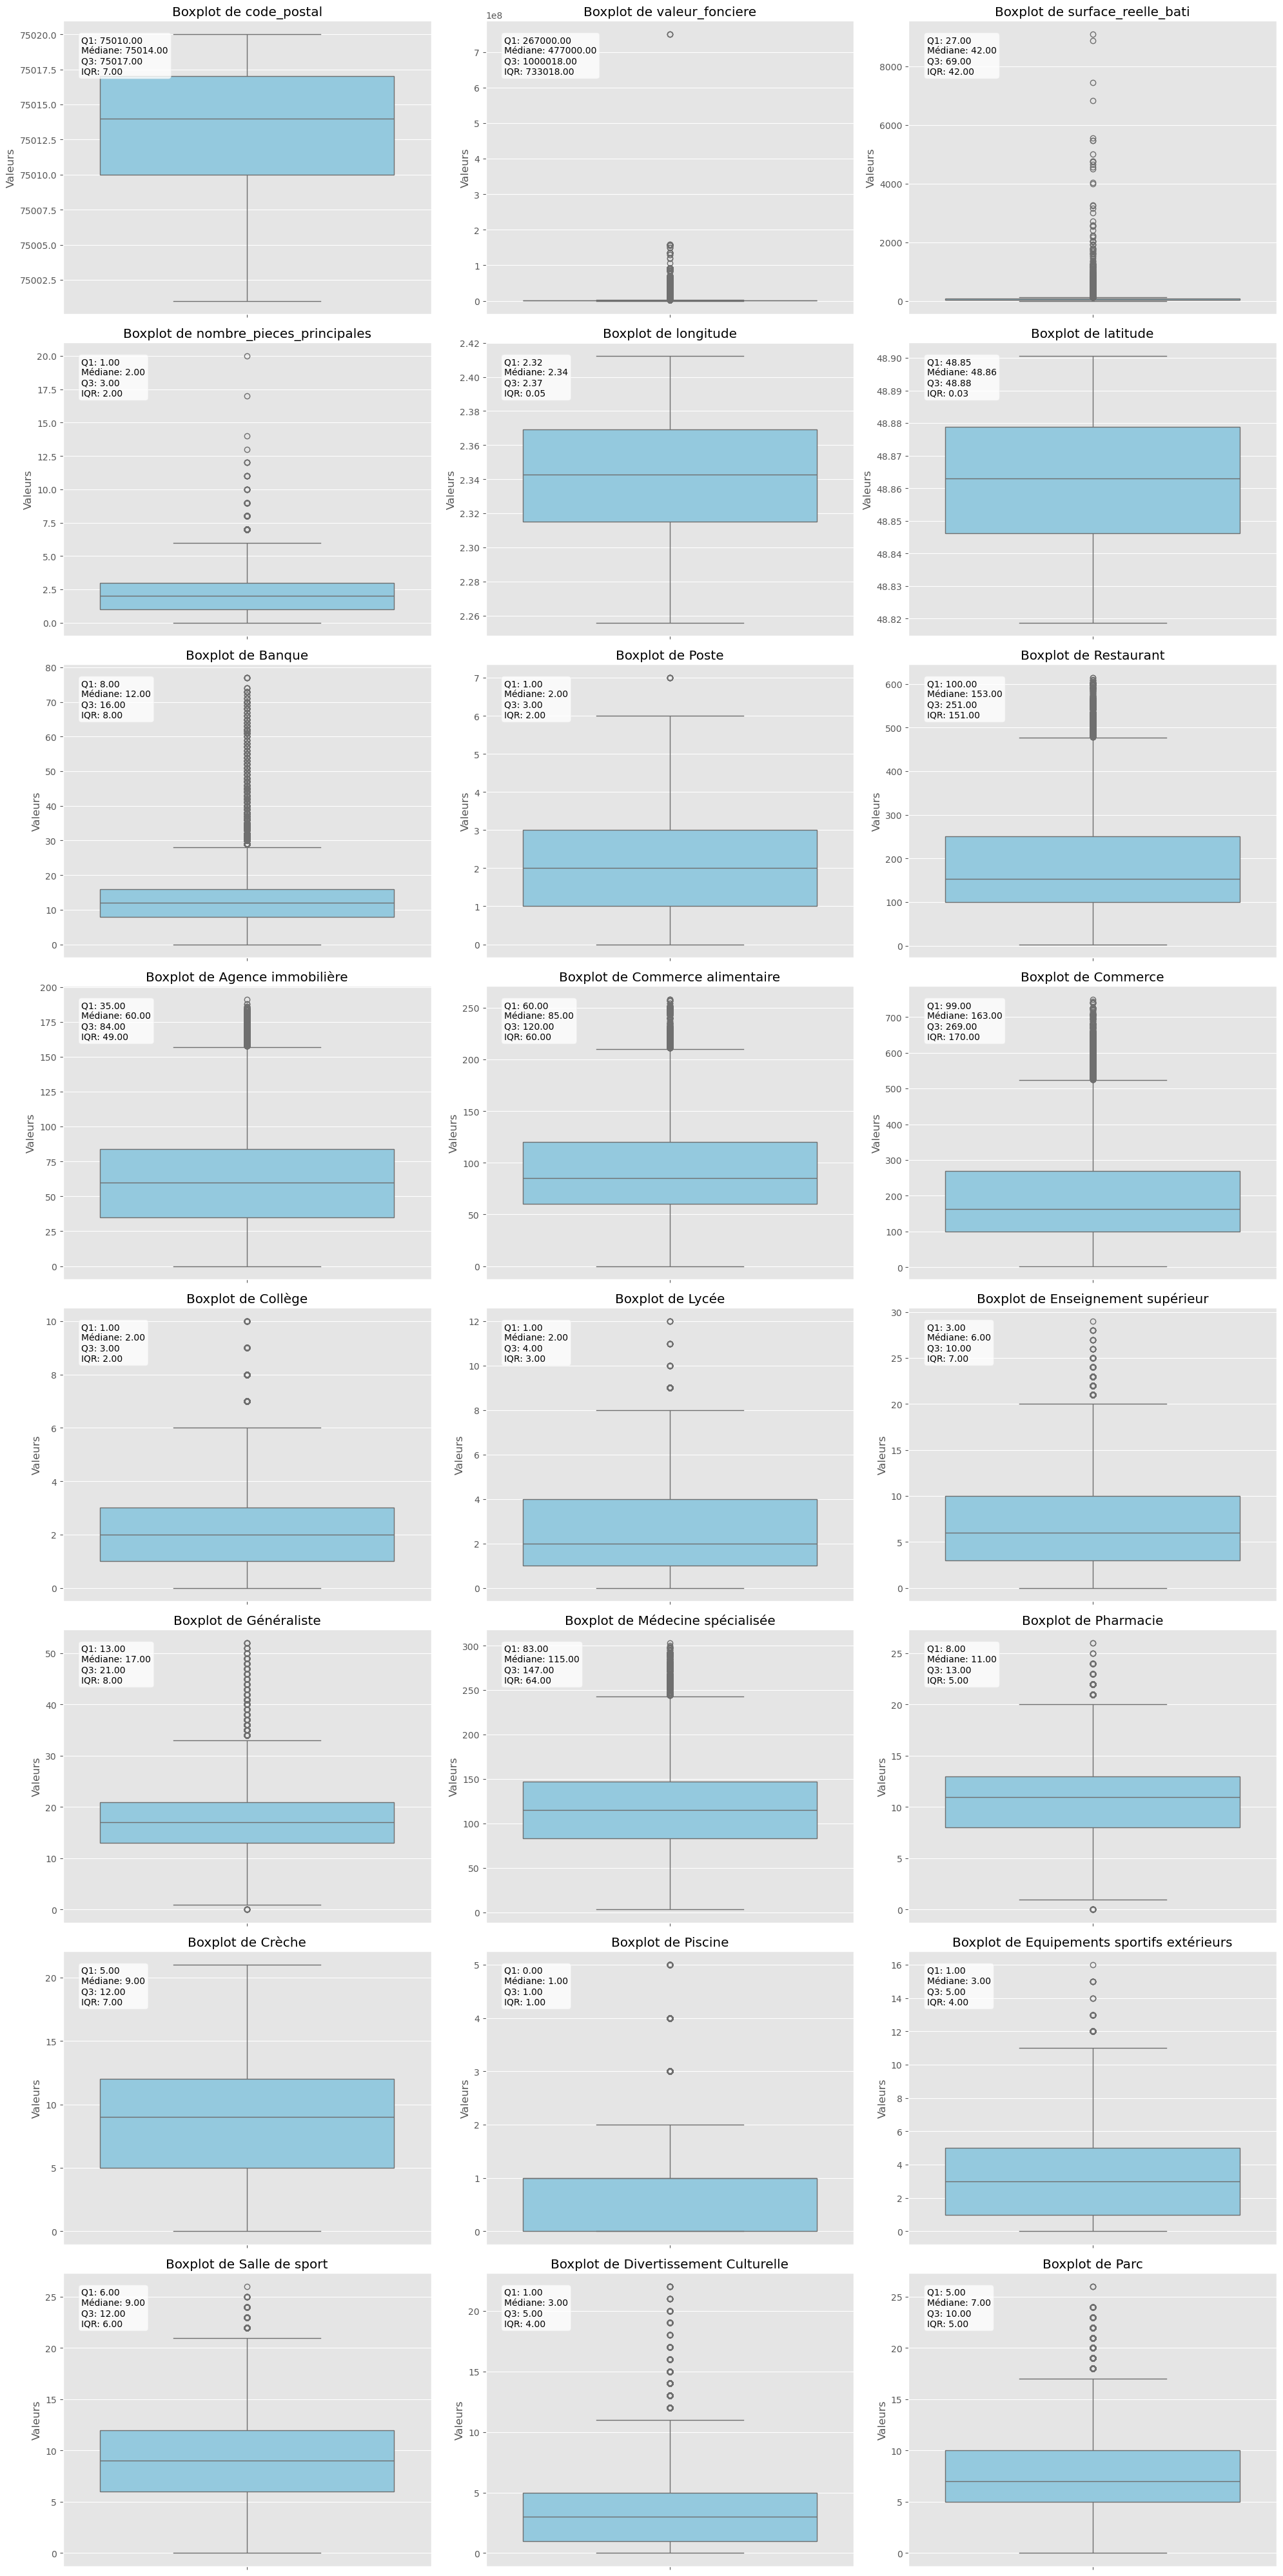

In [9]:

# Liste des colonnes numériques
numeric_cols = ['code_postal','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales', 'longitude', 'latitude', 'Banque', 'Poste', 
                'Restaurant', 'Agence immobilière', 'Commerce alimentaire', 'Commerce', 'Collège', 'Lycée', 'Enseignement supérieur', 
                'Généraliste', 'Médecine spécialisée', 'Pharmacie', 'Crèche', 'Piscine', 'Equipements sportifs extérieurs', 
                'Salle de sport', 'Divertissement Culturelle', 'Parc']

# Configuration de l'affichage
n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(numeric_cols) // n_cols + 1 ) # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(20, 5 * n_rows))

# Création des boxplots individuels
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valeurs')
    plt.xticks(rotation=45)
    
    # Ajouter des annotations statistiques
    q1 = data[col].quantile(0.25)
    median = data[col].median()
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    plt.text(0.05, 0.95, 
             f'Q1: {q1:.2f}\nMédiane: {median:.2f}\nQ3: {q3:.2f}\nIQR: {iqr:.2f}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [10]:

# 1. Calcul des bornes IQR pour chaque variable
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

# 2. Filtrage des outliers
mask = ~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)

# 3. Application des filtres
data_clean = data[mask]

# 4. Résultats
print(f"Nombre initial de lignes : {len(data)}")
print(f"Nombre après suppression des outliers : {len(data_clean)}")
print(f"Pourcentage de données conservées : {len(data_clean)/len(data)*100:.1f}%")

# 5. Réinitialisation de l'index
data_clean = data_clean.reset_index(drop=True)


Nombre initial de lignes : 39641
Nombre après suppression des outliers : 9107
Pourcentage de données conservées : 23.0%


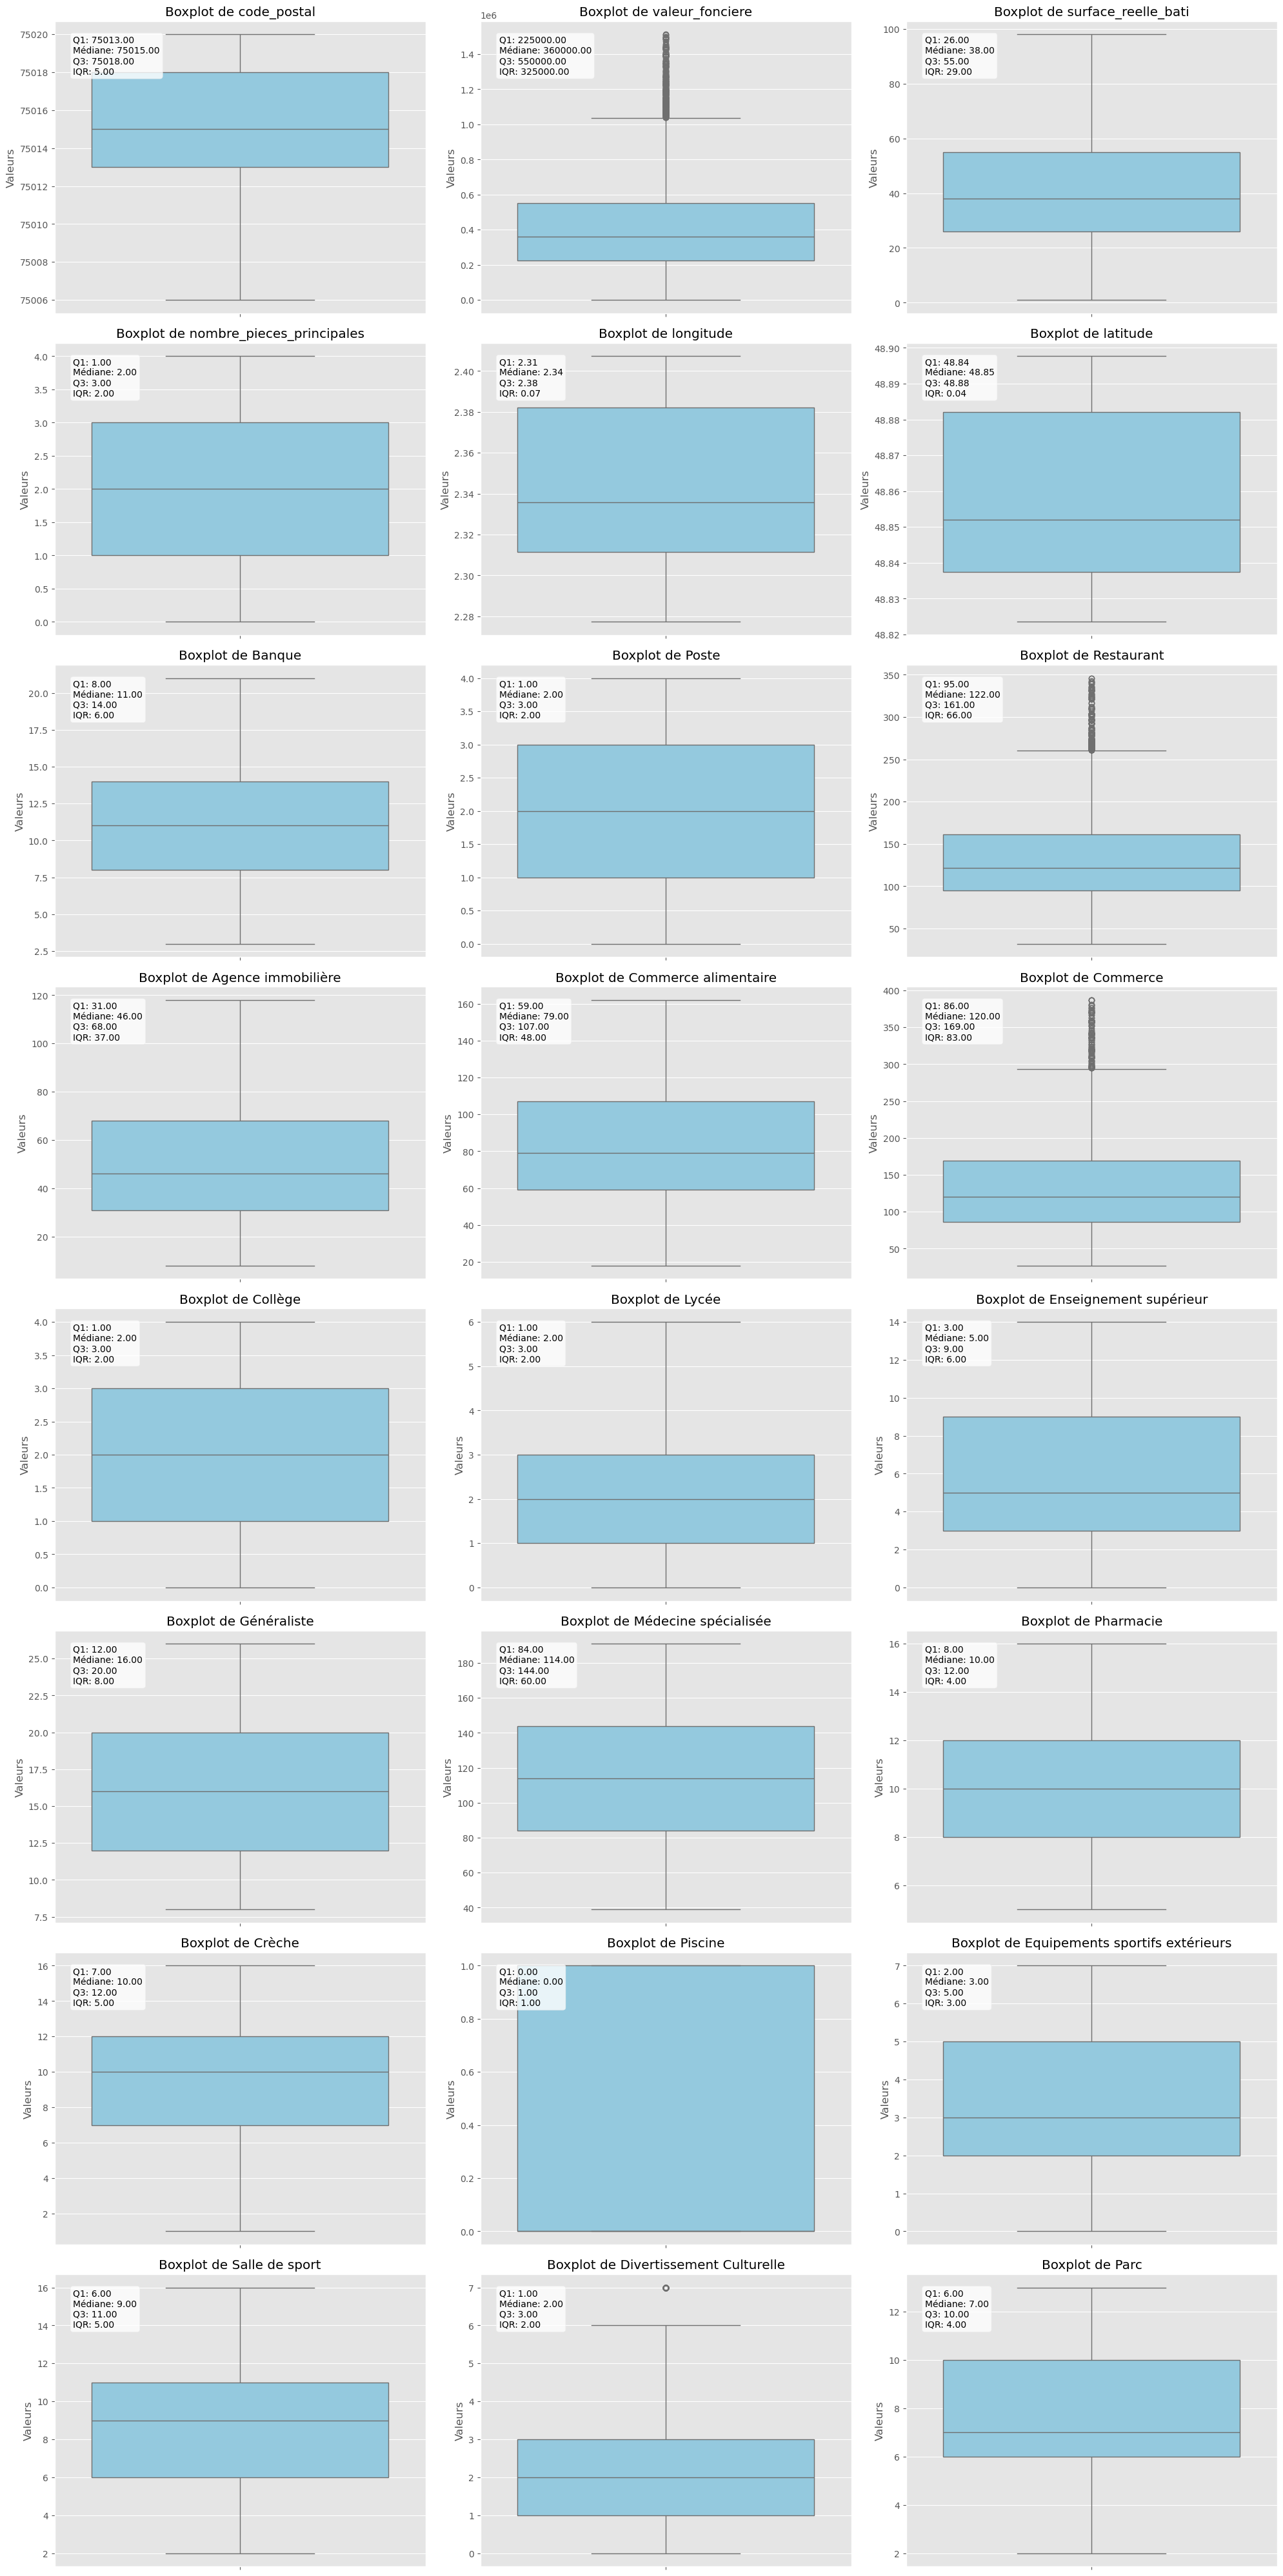

In [11]:

plt.figure(figsize=(20, 5 * n_rows))

# Création des boxplots individuels
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data_clean[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valeurs')
    plt.xticks(rotation=45)
    
    # Ajouter des annotations statistiques
    q1 = data_clean[col].quantile(0.25)
    median = data_clean[col].median()
    q3 = data_clean[col].quantile(0.75)
    iqr = q3 - q1
    
    plt.text(0.05, 0.95, 
             f'Q1: {q1:.2f}\nMédiane: {median:.2f}\nQ3: {q3:.2f}\nIQR: {iqr:.2f}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Corrélations entre les features

<Axes: >

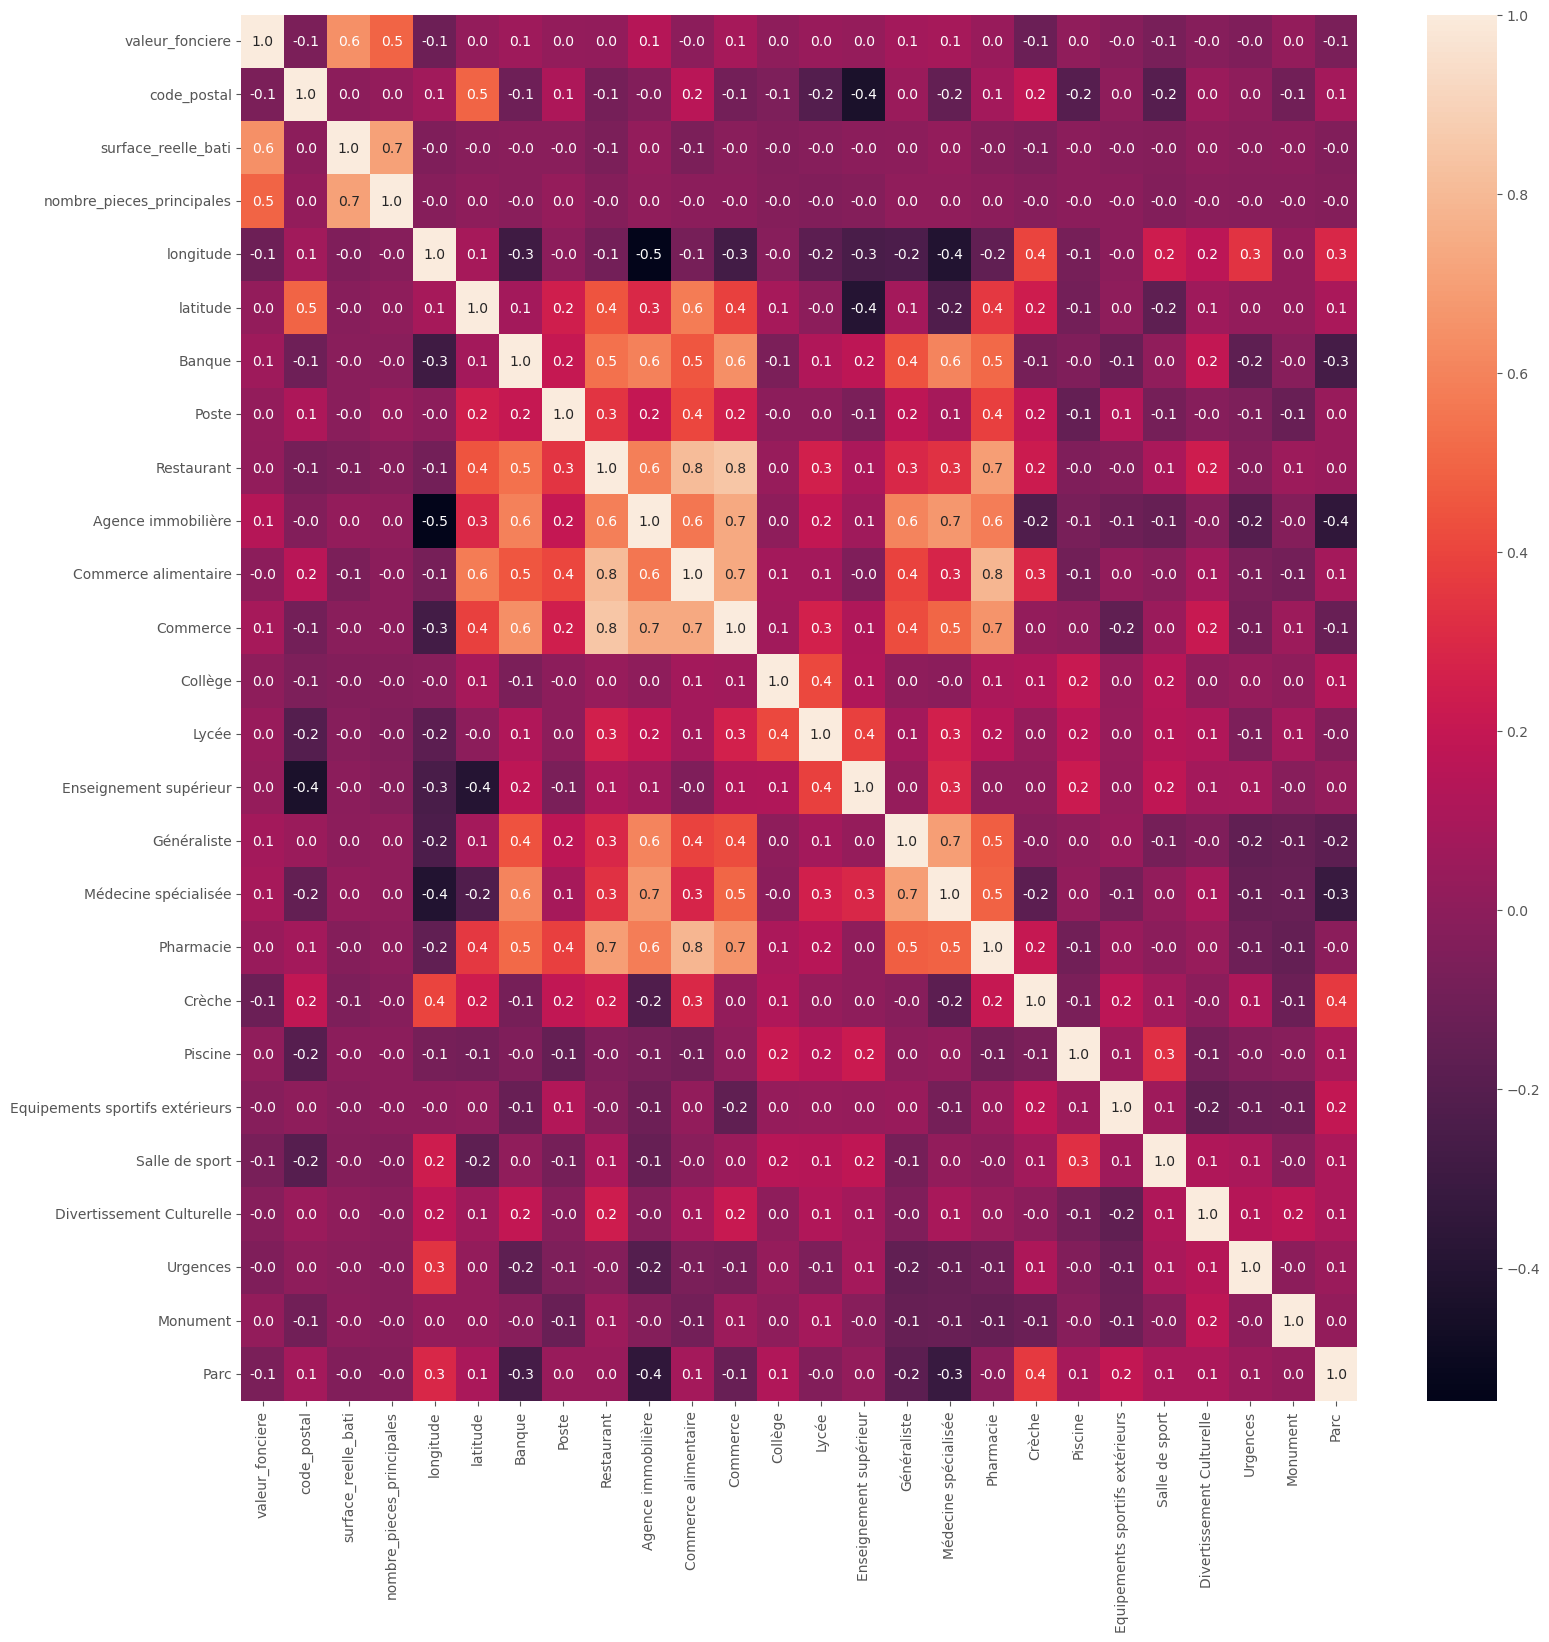

In [13]:
#Correlation matrix
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data_clean[numeric_cols]
f=plt.subplots(figsize=(18,18))
sns.heatmap(data_clean[numeric_cols].corr(),annot=True,fmt='.1f',color='green')

### Analyse des Corrélations Linéaires entre les Features

Suite à l'analyse de la matrice de corrélation, plusieurs relations linéaires importantes ont été identifiées entre les variables du dataset. Ces corrélations peuvent indiquer une redondance dans l'information et influencer la performance des modèles prédictifs. Voici les principales observations :

- **Surface_réelle et Nombre de pièces**  
  La surface réelle d'un bien immobilier est fortement liée au nombre de pièces. En général, une augmentation du nombre de pièces correspond à une plus grande surface.

- **Banque**  
  La variable *Banque* présente une forte corrélation avec plusieurs autres services, notamment :  
  - Restaurant  
  - Agence  
  - Commerce  
  - Pharmacie  
  - Médecine  

- **Restaurant**  
  La présence de restaurants est corrélée avec :  
  - Commerce  
  - Commerce Alimentaire  
  - Pharmacie  
  - Banque  

- **Agence**  
  La variable *Agence* est fortement corrélée avec :  
  - Banque  
  - Commerce  
  - Médecine  

- **Collège et Lycée**  
  Ces deux types d'établissements scolaires sont fortement corrélés, indiquant une interdépendance dans leur répartition géographique.

- **Divertissement culturel**  
  Le divertissement culturel montre une forte corrélation avec :  
  - Commerce  
  - Restaurant  

Ces constats permettront de guider la réduction de dimensionnalité et le choix des features à conserver ou à combiner dans le cadre de la modélisation, afin d'éviter les problèmes de multicolinéarité et de simplifier l'interprétation des modèles.


In [15]:
data_clean.drop(columns=['Divertissement Culturelle','Agence immobilière','Crèche','Restaurant','Pharmacie','Lycée','Médecine spécialisée','nombre_pieces_principales', 'Poste', 'Commerce alimentaire', 'Banque','Urgences'],inplace=True)
data_clean

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,longitude,latitude,Commerce,Collège,Enseignement supérieur,Généraliste,Piscine,Equipements sportifs extérieurs,Salle de sport,Monument,Parc
0,2023-01-06,360000.0,75017,Appartement,36.0,2.322435,48.888709,260,1,5,22,0,3,2,0,6
1,2023-01-05,220000.0,75018,Local industriel. commercial ou assimilé,30.0,2.350789,48.893014,146,4,0,12,1,1,4,0,8
2,2023-01-04,158000.0,75018,Appartement,18.0,2.350789,48.893014,146,4,0,12,1,1,4,0,8
3,2023-01-04,396800.0,75018,Appartement,33.0,2.327940,48.893404,137,4,2,18,0,4,5,0,6
4,2023-01-04,260000.0,75020,Appartement,29.0,2.402664,48.863589,75,2,4,14,0,1,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,2023-12-28,98250.0,75015,Appartement,18.0,2.280893,48.843264,102,2,4,16,1,5,8,0,10
9103,2023-07-04,250000.0,75015,Appartement,28.0,2.293200,48.844472,187,4,11,19,1,4,9,0,8
9104,2023-12-01,285000.0,75012,Local industriel. commercial ou assimilé,74.0,2.383969,48.844180,117,1,5,12,1,4,9,0,11
9105,2023-12-01,285000.0,75012,Appartement,47.0,2.383969,48.844180,117,1,5,12,1,4,9,0,11


<Axes: >

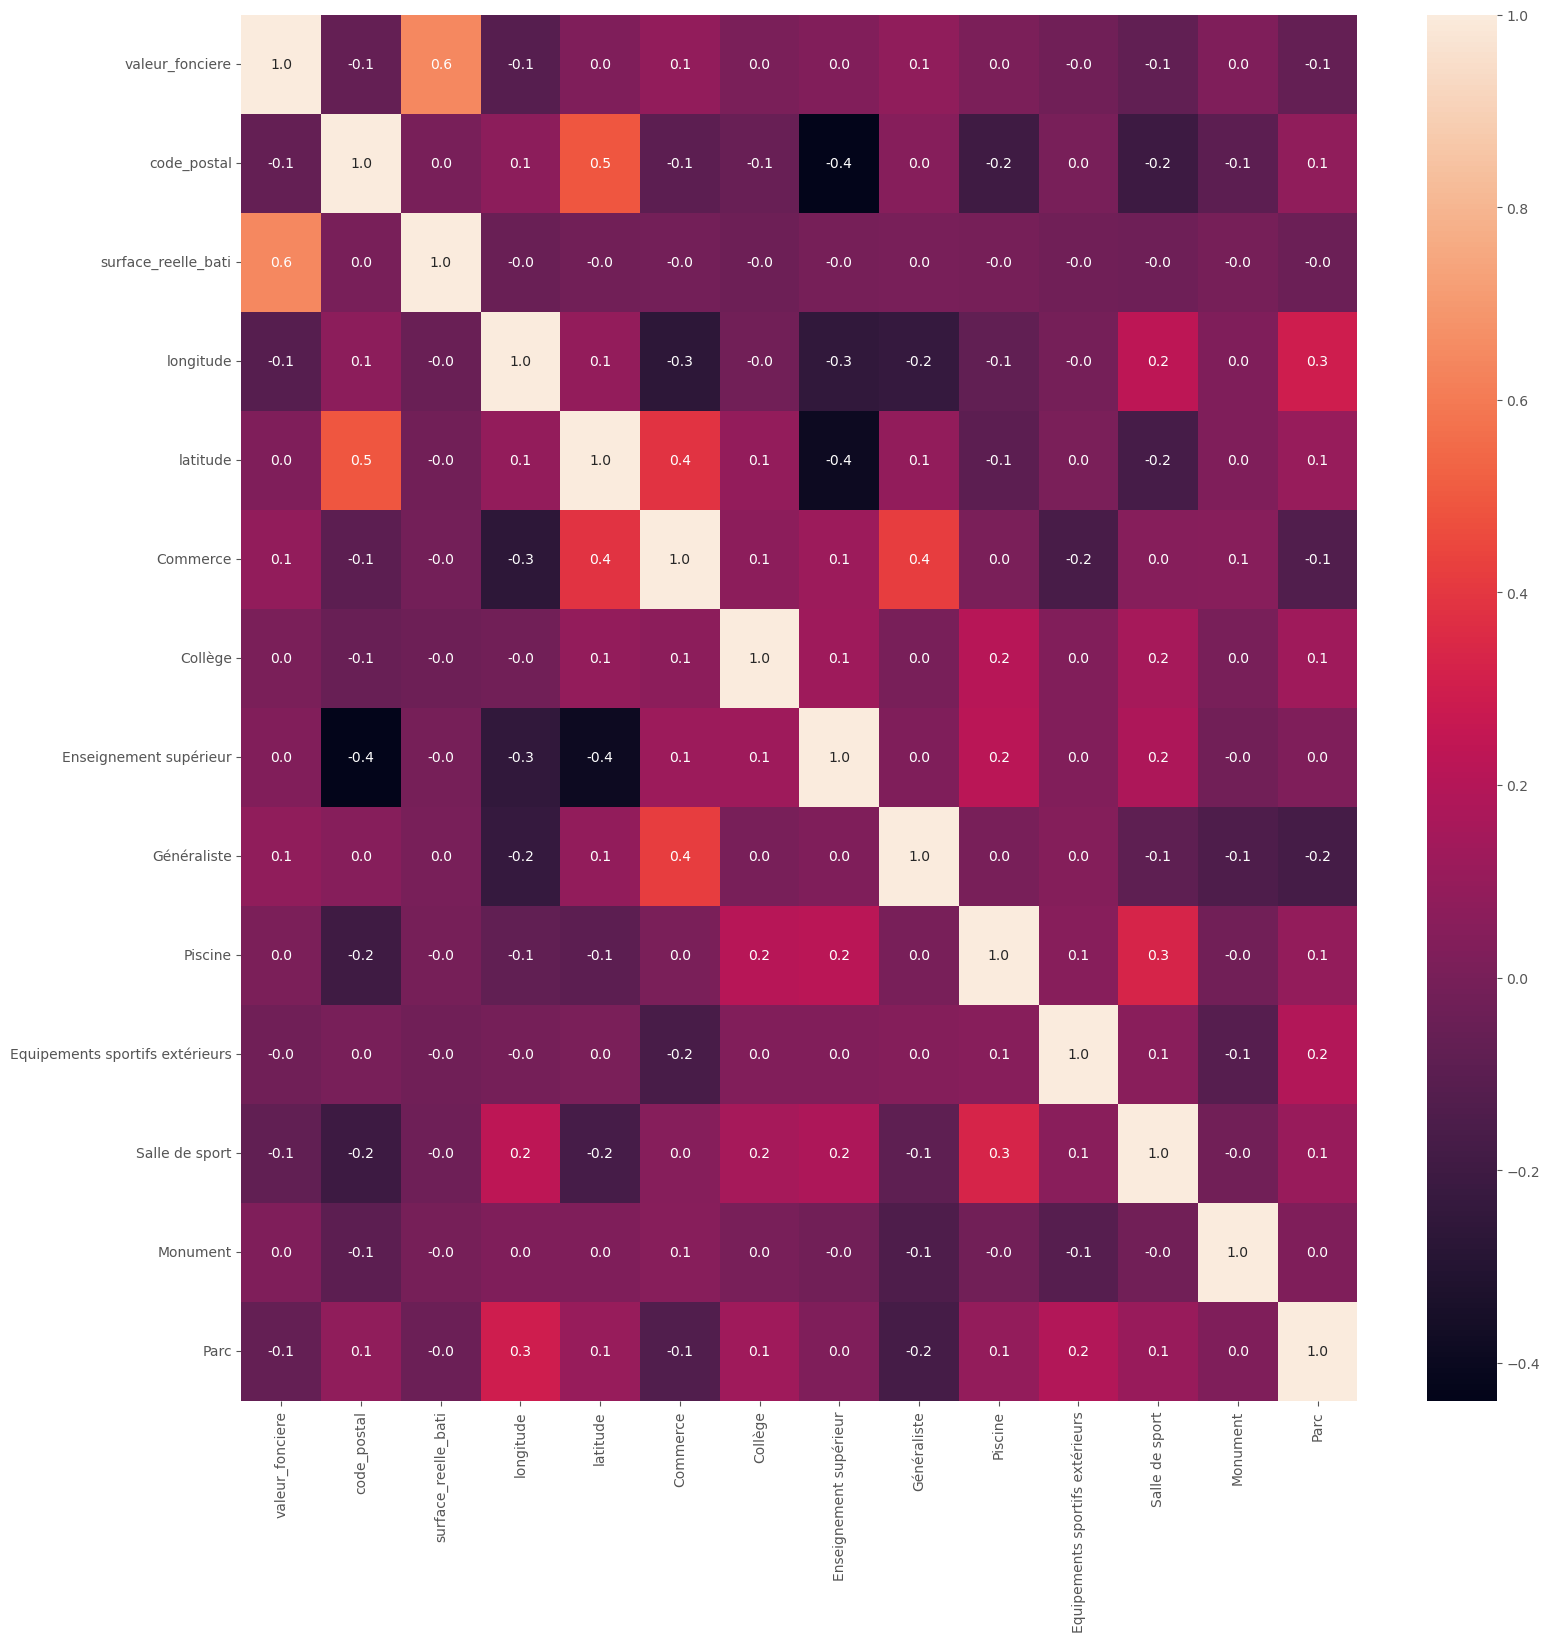

In [16]:
#Correlation matrix
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns
f=plt.subplots(figsize=(18,18))
sns.heatmap(data_clean[numeric_cols].corr(),annot=True,fmt='.1f',color='green')

# II. Encodage et Standardisation des Données

## Encodage des Variables Catégorielles

Les algorithmes de machine learning requièrent des données numériques en entrée. Ainsi, les variables catégorielles doivent être converties en variables numériques, un processus appelé **encodage**. Dans notre dataset, la seule variable catégorielle est *type_local*. Nous allons l'encoder en utilisant la méthode **One-Hot Encoding**, qui crée une colonne binaire distincte pour chaque catégorie présente dans la variable.

Par exemple, si *type_local* contient les catégories "Appartement", "Maison" et "Commerce", l'encodage produira trois colonnes distinctes :

- type_local_Appartement
- type_local_Maison
- type_local_Commerce

Chaque ligne du dataset aura une valeur de 1 dans la colonne correspondant à sa catégorie, et 0 dans les autres.

## Standardisation des Variables Numériques

Les variables numériques du dataset peuvent avoir des échelles différentes, ce qui peut affecter les performances des algorithmes de machine learning. Pour remédier à cela, il est essentiel de **standardiser** ces variables. La standardisation consiste à transformer les valeurs de manière à ce qu'elles aient une moyenne de 0 et un écart-type de 1. Cette transformation permet d'harmoniser les échelles des différentes variables, facilitant ainsi l'apprentissage des modèles.


---



In [18]:
from sklearn.preprocessing import StandardScaler

def prepocessing_data(df):
    # 1. Gestion de la date
    df["date_mutation"] = pd.to_datetime(df["date_mutation"])
    df["annee_mutation"] = df["date_mutation"].dt.year  # Créer une feature numérique
    df = df.drop(columns=["date_mutation"])  # Supprimer la colonne datetime originale
    
    # 2. Encodage des variables catégorielles AVANT la mise à l'échelle
    df = pd.get_dummies(df, columns=["type_local"])
    
    # 3. Sélectionner uniquement les colonnes numériques
    numeric_cols = df.select_dtypes(include=["number"]).columns
    df_numeric = df[numeric_cols]
    
    # 4. Normalisation
    std_scale = StandardScaler().fit(df_numeric)
    X_scaled = std_scale.transform(df_numeric)
    
    dfScale = pd.DataFrame(X_scaled, columns=df_numeric.columns, index=df_numeric.index)
    return dfScale

# Appliquer le prétraitement

data_clean_encoded = data_clean.copy()
data_clean_encoded["date_mutation"] = pd.to_datetime(data_clean_encoded["date_mutation"])
data_clean_encoded["annee_mutation"] = data_clean_encoded["date_mutation"].dt.year 
data_clean_encoded = data_clean_encoded.drop(columns=["date_mutation"])
data_clean_encoded = pd.get_dummies(data_clean_encoded, columns=['type_local'])

dfScale = prepocessing_data(data_clean.copy())
dfScale.head()

,valeur_fonciere,code_postal,surface_reelle_bati,longitude,latitude,Commerce,Collège,Enseignement supérieur,Généraliste,Piscine,Equipements sportifs extérieurs,Salle de sport,Monument,Parc,annee_mutation
0,-0.207336,0.627007,-0.266851,-0.560727,1.358564,1.951653,-1.138207,-0.201639,1.285622,-0.861181,-0.247663,-1.924070,-0.253691,-0.578915,0.0
1,-0.718436,0.937984,-0.560343,0.183238,1.547222,0.186988,1.690847,-1.587543,-0.889928,1.161196,-1.351389,-1.339811,-0.253691,0.133782,0.0
2,-0.944781,0.937984,-1.147326,0.183238,1.547222,0.186988,1.690847,-1.587543,-0.889928,1.161196,-1.351389,-1.339811,-0.253691,0.133782,0.0
3,-0.072989,0.937984,-0.413597,-0.416284,1.564313,0.047673,1.690847,-1.033181,0.415402,-0.861181,0.304200,-1.047682,-0.253691,-0.578915,0.0
4,-0.572407,1.559937,-0.609258,1.544358,0.257726,-0.912058,-0.195189,-0.478820,-0.454818,-0.861181,-1.351389,0.120836,-0.253691,1.202829,0.0


In [19]:
data_clean_encoded

,valeur_fonciere,code_postal,surface_reelle_bati,longitude,latitude,Commerce,Collège,Enseignement supérieur,Généraliste,Piscine,Equipements sportifs extérieurs,Salle de sport,Monument,Parc,annee_mutation,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,type_local_Maison
0,360000.0,75017,36.0,2.322435,48.888709,260,1,5,22,0,3,2,0,6,2023,True,False,False
1,220000.0,75018,30.0,2.350789,48.893014,146,4,0,12,1,1,4,0,8,2023,False,True,False
2,158000.0,75018,18.0,2.350789,48.893014,146,4,0,12,1,1,4,0,8,2023,True,False,False
3,396800.0,75018,33.0,2.327940,48.893404,137,4,2,18,0,4,5,0,6,2023,True,False,False
4,260000.0,75020,29.0,2.402664,48.863589,75,2,4,14,0,1,9,0,11,2023,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,98250.0,75015,18.0,2.280893,48.843264,102,2,4,16,1,5,8,0,10,2023,True,False,False
9103,250000.0,75015,28.0,2.293200,48.844472,187,4,11,19,1,4,9,0,8,2023,True,False,False
9104,285000.0,75012,74.0,2.383969,48.844180,117,1,5,12,1,4,9,0,11,2023,False,True,False
9105,285000.0,75012,47.0,2.383969,48.844180,117,1,5,12,1,4,9,0,11,2023,True,False,False


## III. Models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import clone

target = 'valeur_fonciere'

# Préparation des données pour le dataset "non standardisé"
X_encoded = data_clean_encoded.drop(columns=[target])
y_encoded = data_clean_encoded[target]

# Préparation des données pour le dataset standardisé
X_scaled = dfScale.drop(columns=[target])
y_scaled = dfScale[target]

# Split en train/test
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.20, random_state=42)
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

# Définition d'un dictionnaire de modèles avec leur instance de base
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'CatBoostRegressor' : CatBoostRegressor(iterations=100, random_state=42, verbose=False),
    'LGBMRegressor' : LGBMRegressor(n_estimators=100, random_state=42, verbose=0)
}

# Fonction d'évaluation d'un modèle sans validation croisée
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    # Entraînement
    model.fit(X_train, y_train)
    # Prédictions
    y_pred = model.predict(X_test)
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"R² sur test: {r2:.4f}")
    print(f"MSE sur test: {mse:.4f}")
    print(f"MAE sur test: {mae:.4f}\n")

# Dictionnaire pour accéder aux deux jeux de données
datasets = {
    'Encoded': (X_train_enc, X_test_enc, y_train_enc, y_test_enc),
    'Scaled': (X_train_scale, X_test_scale, y_train_scale, y_test_scale)
}

# Boucle sur chaque modèle et sur chacun des jeux de données
for model_name, model_instance in models.items():
    for ds_name, (X_train, X_test, y_train, y_test) in datasets.items():
        # Cloner le modèle pour repartir d'une instance propre
        model = clone(model_instance)
        eval_name = f"{model_name} - {ds_name}"
        evaluate_model(eval_name, model, X_train, X_test, y_train, y_test)


--- RandomForest - Encoded ---
R² sur test: 0.6032
MSE sur test: 28182851502.0191
MAE sur test: 99853.6345

--- RandomForest - Scaled ---
R² sur test: 0.6095
MSE sur test: 0.3696
MAE sur test: 0.3667

--- CatBoostRegressor - Encoded ---
R² sur test: 0.6312
MSE sur test: 26189534509.5318
MAE sur test: 99718.2050

--- CatBoostRegressor - Scaled ---
R² sur test: 0.6207
MSE sur test: 0.3590
MAE sur test: 0.3733

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
--- LGBMRegressor - Encoded ---
R² sur test: 0.6369
MSE sur test: 25789108200.9924
MAE sur test: 98781.0039

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
--- LGBMRegressor - Scaled ---
R² sur test: 0.6215
MSE sur test: 0.3583
MAE sur test: 0.3675



# Comparaison des Modèles et Sélection du Meilleur Modèle

Après avoir entraîné plusieurs modèles de régression sur nos datasets, nous avons évalué leurs performances à l'aide de trois métriques principales : le coefficient de détermination (R²), l'erreur quadratique moyenne (MSE) et l'erreur absolue moyenne (MAE). Voici les résultats obtenus :

| Modèle                         | Prétraitement | R²    | MSE               | MAE        |
|--------------------------------|---------------|-------|-------------------|------------|
| **RandomForestRegressor**      | Encodé        | 0,603 | 28 182 851 502,02 | 99 853,63  |
|                                | Standardisé   | 0,610 | 0,3696            | 0,3667     |
| **CatBoostRegressor**          | Encodé        | 0,631 | 26 189 534 509,53 | 99 718,21  |
|                                | Standardisé   | 0,621 | 0,3590            | 0,3733     |
| **LGBMRegressor**              | Encodé        | 0,637 | 25 789 108 200,99 | 98 781,00  |
|                                | Standardisé   | 0,622 | 0,3583            | 0,3675     |

## Interprétation des Métriques

- **R² (Coefficient de Détermination)** : Cette métrique indique la proportion de la variance de la variable cible expliquée par le modèle. Une valeur proche de 1 suggère une bonne capacité explicative du modèle. Dans notre cas, les valeurs de R² varient entre 0,603 et 0,637, indiquant que les modèles expliquent environ 60 % à 64 % de la variance des prix immobiliers.

- **MSE (Erreur Quadratique Moyenne)** : Le MSE mesure la moyenne des carrés des erreurs, pénalisant davantage les grandes erreurs. Des valeurs plus faibles de MSE sont préférables. Les MSE obtenus sont élevés pour les données non standardisées, ce qui peut être dû à l'échelle des valeurs de la variable cible. Pour les données standardisées, les MSE sont plus faibles, reflétant une meilleure performance.

- **MAE (Erreur Absolue Moyenne)** : Le MAE représente la moyenne des valeurs absolues des erreurs, offrant une interprétation directe de l'erreur moyenne en unités de la variable cible. Comme pour le MSE, des valeurs plus faibles sont préférables. Les MAE suivent une tendance similaire aux MSE dans nos résultats.

## Impact de la Standardisation

La standardisation des variables numériques vise à harmoniser les échelles des différentes variables, ce qui peut améliorer les performances des modèles. Dans nos résultats, la standardisation semble avoir un impact positif sur le RandomForestRegressor, avec une légère augmentation du R² et une diminution du MSE et du MAE. Pour les autres modèles, l'impact est moins prononcé.

## Sélection du Meilleur Modèle

En comparant les performances, le **LGBMRegressor** sur les données encodées sans standardisation présente le meilleur R² (0,637) et les valeurs de MSE et MAE les plus faibles parmi les modèles testés. Cela suggère que ce modèle est le plus performant pour notre projet d'estimation des prix immobiliers à Paris pour cette première approche.


---



# Feature Engineering



Vu nos précédents résultats, nous allons explorer une nouvelle approche : le **feature engineering**. Cette technique consiste à transformer et enrichir les données brutes pour créer de nouvelles features plus pertinentes et mieux adaptées aux modèles de machine learning. L'objectif est d'améliorer les performances précédemment obtenues en intégrant des connaissances spécifiques sur l'environnement des biens immobiliers.

Le feature engineering permet notamment de :
- **Extraire des informations supplémentaires** à partir de données existantes (par exemple, extraire l'année et le mois à partir de la date).
- **Réduire la redondance** en combinant plusieurs variables fortement corrélées en un indice unique.

Dans notre cas, nous allons créer plusieurs indices pour synthétiser l'impact des équipements du quartier :
- **Indice Commercial** : Cet indice regroupe les variables liées aux services et commerces, telles que *Banque*, *Poste*, *Restaurant*, *Agence immobilière*, *Commerce alimentaire* et *Commerce*. Il permettra de mesurer l'intensité commerciale dans le voisinage du bien.
- **Indice Éducatif** : Il regroupera les établissements scolaires, c'est-à-dire *Collège*, *Lycée* et *Enseignement supérieur*, afin d'évaluer l'offre éducative autour du bien.
- **Indice Santé** : Cet indice combinera les variables liées aux services de santé, comme *Généraliste*, *Médecine spécialisée*, *Pharmacie* et *Urgences*. Il offre une vision globale de l'accessibilité aux soins.
- **Indice Loisirs** : Il regroupera les équipements de loisirs et sportifs, notamment *Piscine*, *Équipements sportifs extérieurs*, *Salle de sport* et *Divertissement Culturelle*, pour quantifier l'offre de loisirs dans le quartier.

Ces nouvelles features, en condensant l'information issue de plusieurs variables individuelles, devraient permettre à nos modèles de mieux capter l'influence de l'environnement sur le prix des maisons, et ainsi d'améliorer la qualité des prédictions.


In [25]:
# 1. Sélection des variables à conserver

# Variables fondamentales du bien immobilier
cols_fundamentales = [
    "date_mutation", 
    "valeur_fonciere", 
    "code_postal", 
    "type_local", 
    "surface_reelle_bati", 
    "nombre_pieces_principales", 
    "longitude", 
    "latitude"
]

# Variables d'environnement (équipements et infrastructures)
cols_environnement = [
    "Banque", 
    "Poste", 
    "Restaurant", 
    "Agence immobilière", 
    "Commerce alimentaire", 
    "Commerce",
    "Collège", 
    "Lycée", 
    "Enseignement supérieur", 
    "Généraliste", 
    "Médecine spécialisée", 
    "Pharmacie", 
    "Crèche", 
    "Piscine", 
    "Equipements sportifs extérieurs", 
    "Salle de sport", 
    "Divertissement Culturelle", 
    "Urgences", 
    "Monument", 
    "Parc"
]

# Conserver uniquement les colonnes d'intérêt
cols_to_keep = cols_fundamentales + cols_environnement
df_final = data[cols_to_keep].copy()

# 2. Feature Engineering - Agrégation et Regroupement des Variables Corrélées

# Indice Commercial : regroupe les services liés aux transactions et commerces
df_final['Indice_Commercial'] = (
    df_final['Banque'] + 
    df_final['Poste'] + 
    df_final['Restaurant'] + 
    df_final['Agence immobilière'] + 
    df_final['Commerce alimentaire'] + 
    df_final['Commerce']
)

# Indice Educatif : regroupe les établissements scolaires
df_final['Indice_Educatif'] = (
    df_final['Collège'] + 
    df_final['Lycée'] + 
    df_final['Enseignement supérieur']+
    df_final['Crèche']
)

# Indice Santé : regroupe les services de santé
df_final['Indice_Sante'] = (
    df_final['Généraliste'] + 
    df_final['Médecine spécialisée'] + 
    df_final['Pharmacie'] + 
    df_final['Urgences']
)

# Indice Loisirs : regroupe les équipements sportifs et de loisirs
df_final['Indice_Loisirs'] = (
    df_final['Piscine'] + 
    df_final['Equipements sportifs extérieurs'] + 
    df_final['Salle de sport'] + 
    df_final['Divertissement Culturelle']
)


#supprimer les colonnes individuelles ayant servi à créer les indices afin de réduire la redondance
cols_to_drop = [
    'Banque', 'Poste', 'Restaurant', 'Agence immobilière', 
    'Commerce alimentaire', 'Commerce', 
    'Collège', 'Lycée', 'Enseignement supérieur',
    'Généraliste', 'Médecine spécialisée', 'Pharmacie', 'Urgences',
    'Piscine', 'Equipements sportifs extérieurs', 'Salle de sport', 
    'Divertissement Culturelle','Crèche'
]
df_final = df_final.drop(columns=cols_to_drop)


In [26]:
df_final.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Monument,Parc,Indice_Commercial,Indice_Educatif,Indice_Sante,Indice_Loisirs
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083,1,5,1497,18,180,32
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818,0,5,1122,24,136,17
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255,0,5,611,15,297,7
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564,0,5,948,29,185,29
4,2023-01-03,295000.0,75017,Appartement,28.0,2,2.318419,48.893075,0,8,445,22,90,24


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression



# ----------------------------
# Étape 1 : Préprocessing du Dataset
# ----------------------------

# Convertir 'date_mutation' en datetime et extraire des features temporelles
df_final['date_mutation'] = pd.to_datetime(df_final['date_mutation'])
df_final['year'] = df_final['date_mutation'].dt.year
df_final['month'] = df_final['date_mutation'].dt.month

# On peut ensuite supprimer la colonne d'origine 'date_mutation'
df_final = df_final.drop(columns=['date_mutation'])

# Encodage des variables catégorielles :
# La variable 'type_local' est encodée avec One-Hot Encoding.
df_final = pd.get_dummies(df_final, columns=['type_local'], drop_first=False)

# ----------------------------
# Étape 2 : Définition des Features et de la Variable Cible
# ----------------------------

target = 'valeur_fonciere'
X = df_final.drop(columns=[target])
y = df_final[target]

# Séparation en ensembles d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Étape 3 : Définition et Entraînement de Différents Modèles de Machine Learning
# ----------------------------

models = {
    'RandomForest': RandomForestRegressor(criterion='poisson',n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, random_state=42, verbose=False),
    'LGBM': LGBMRegressor(objective='poisson',n_estimators=100, random_state=42, verbose=0)
}

def evaluate_model(model, X_test, y_test):
    """Calcule et retourne MSE, RMSE, MAE et R² pour le modèle fourni."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

# Entraînement et évaluation de chaque modèle
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"--- {name} ---")
    print(f"R² sur test: {r2:.4f}")
    print(f"MSE sur test: {mse:.4f}")
    print(f"RMSE sur test: {rmse:.4f}")
    print(f"MAE sur test: {mae:.4f}\n")


--- RandomForest ---
R² sur test: 0.9276
MSE sur test: 15481157454371.5527
RMSE sur test: 3934610.2036
MAE sur test: 740827.7228

--- CatBoost ---
R² sur test: 0.9208
MSE sur test: 16923098570012.2090
RMSE sur test: 4113769.3871
MAE sur test: 1513823.4998

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
--- LGBM ---
R² sur test: 0.8789
MSE sur test: 25891828991978.4570
RMSE sur test: 5088401.4181
MAE sur test: 1311716.4654



In [28]:
X_train.columns

Index(['code_postal', 'surface_reelle_bati', 'nombre_pieces_principales',
       'longitude', 'latitude', 'Monument', 'Parc', 'Indice_Commercial',
       'Indice_Educatif', 'Indice_Sante', 'Indice_Loisirs', 'year', 'month',
       'type_local_Appartement',
       'type_local_Local industriel. commercial ou assimilé',
       'type_local_Maison'],
      dtype='object')

# Comparaison des Modèles de Prédiction

Nous avons évalué trois modèles de régression pour la prédiction de la valeur foncière à partir de diverses caractéristiques. Voici les résultats obtenus sur l’ensemble de test :

| **Modèle**       | **R²**  | **MSE**                        | **RMSE**        | **MAE**        |
|------------------|---------|--------------------------------|-----------------|----------------|
| **RandomForest** | 0.9276  | 15,481,157,454,371.55          | 3,934,610.20    | 740,827.72     |
| **CatBoost**     | 0.9208  | 16,923,098,570,012.21          | 4,113,769.39    | 1,513,823.50   |
| **LightGBM**     | 0.8789  | 25,891,828,991,978.46          | 5,088,401.42    | 1,311,716.47   |

## Analyse des Résultats

- **R² (Coefficient de Détermination) :**  
  Le modèle RandomForest présente le meilleur R² avec 0.9276, indiquant qu'il explique environ 92,76% de la variance des valeurs foncières. CatBoost le suit de près avec 0.9208, tandis que LightGBM affiche une performance moindre (0.8789).

- **Erreur Quadratique Moyenne (MSE) et Racine de l'Erreur Quadratique Moyenne (RMSE) :**  
  Les erreurs quadratiques sont les plus faibles pour RandomForest (MSE de 15,481,157,454,371.55 et RMSE de 3,934,610.20), ce qui signifie que les prédictions de ce modèle s'écartent moins des valeurs réelles par rapport aux autres modèles.

- **Erreur Absolue Moyenne (MAE) :**  
  RandomForest obtient également la MAE la plus faible (740,827.72), comparé à CatBoost (1,513,823.50) et LightGBM (1,311,716.47), ce qui renforce son avantage en termes de précision des prédictions.

## Conclusion

Au vu des métriques :
- **RandomForest** offre le meilleur compromis entre une forte capacité explicative (R² élevé) et des erreurs faibles (MSE, RMSE et MAE réduits).
- **CatBoost** se montre performant en R² mais affiche des erreurs absolues et quadratiques supérieures.
- **LightGBM** reste le moins performant de ce groupe.

Ainsi, **RandomForest** est recommandé comme le modèle à utiliser pour la prédiction de la valeur foncière dans ce projet.



# Comparaison des Approches avec et sans Feature Engineering et Choix du Modèle Final

Dans cette étude, nous avons testé deux approches pour la prédiction du prix des biens immobiliers à Paris :

1. **Sans Feature Engineering**  
   Les modèles ont été entraînés sur le dataset initial après encodage et standardisation, sans ajouter de nouvelles features (indices environnementaux ou agrégations).

2. **Avec Feature Engineering**  
   Nous avons enrichi le dataset en créant des indices synthétisant l'impact des équipements du quartier (par exemple, Indice Commercial, Indice Santé, etc.), ainsi qu'en extrayant des informations temporelles à partir de la date de mutation.

---

## Résultats Sans Feature Engineering

| Modèle                    | Prétraitement | R²    | MSE                    | MAE         |
|---------------------------|---------------|-------|------------------------|-------------|
| **RandomForestRegressor** | Encodé        | 0,603 | 28 182 851 502,02      | 99 853,63   |
|                           | Standardisé   | 0,610 | 0,3696                 | 0,3667      |
| **CatBoostRegressor**     | Encodé        | 0,631 | 26 189 534 509,53      | 99 718,21   |
|                           | Standardisé   | 0,621 | 0,3590                 | 0,3733      |
| **LGBMRegressor**         | Encodé        | 0,637 | 25 789 108 200,99      | 98 781,00   |
|                           | Standardisé   | 0,622 | 0,3583                 | 0,3675      |

*Observation :*  
Le meilleur modèle parmi ceux testés sans feature engineering est le **LGBMRegressor** sur données encodées, avec un R² de 0,637 et des erreurs légèrement inférieures. Cependant, les performances globales restent modérées.

---

## Résultats Avec Feature Engineering

| **Modèle**       | **R²**  | **MSE**                        | **RMSE**        | **MAE**        |
|------------------|---------|--------------------------------|-----------------|----------------|
| **RandomForest** | 0.9276  | 15,481,157,454,371.55          | 3,934,610.20    | 740,827.72     |
| **CatBoost**     | 0.9208  | 16,923,098,570,012.21          | 4,113,769.39    | 1,513,823.50   |
| **LightGBM**     | 0.8789  | 25,891,828,991,978.46          | 5,088,401.42    | 1,311,716.47   |

*Observation :*  
Les modèles entraînés avec des features enrichies montrent une nette amélioration des performances. En particulier, **RandomForest** affiche un R² de 0.9276, indiquant qu'il explique près de 93 % de la variance des prix immobiliers, avec des MSE et RMSE sensiblement inférieurs.

---

## Conclusion et Choix du Modèle Final

- **Sans Feature Engineering :**  
  Le meilleur modèle était le **LGBMRegressor** sur données encodées, avec des résultats corrects mais limités (R² ≈ 0,637).

- **Avec Feature Engineering :**  
  Les performances se sont améliorées de manière significative. Le modèle **RandomForest** se démarque avec un R² de 0.9276 et des erreurs quadratiques faibles, même si son MAE est légèrement supérieur à celui de RandomForest. Globalement, CatBoost capture mieux la variabilité des données et offre une meilleure capacité prédictive.

**Choix Final :**  
Nous retenons le **modèle RandomForest avec feature engineering** comme le meilleur modèle pour notre projet de prédiction du prix des biens immobiliers. Cette approche permet d'exploiter au maximum l'information environnementale et temporelle intégrée dans le dataset final, aboutissant à des performances nettement supérieures à l'approche sans feature engineering.


## Sauvegarde du meilleur modèle pour utilisation au niveau du front end

In [33]:

from joblib import dump
import json

# Identifier le meilleur modèle
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]

# Sauvegarde
dump(best_model, 'real_estate_model.pkl')
print(f"Modèle sauvegardé : {best_model_name}")


Modèle sauvegardé : RandomForest
